In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data from csv file
x_train = pd.read_csv('x_train.csv', header=None)
y_train = pd.read_csv('y_train.csv', header=None)
x_test = pd.read_csv('x_test.csv', header=None)
y_testtrue = pd.read_csv('y_testtrue.csv', header=None)
y_testpred = pd.read_csv('y_testpred.csv', header=None)
y_testpred_std = pd.read_csv('y_testpred_std.csv', header=None)

# check size of the data
print("size of x_train: ", x_train.shape)
print("size of y_train: ", y_train.shape)
print("size of x_test: ", x_test.shape)
print("size of y_testtrue: ", y_testtrue.shape)
print("size of y_testpred: ", y_testpred.shape)
print("size of y_testpred_sted: ", y_testpred_std.shape)


size of x_train:  (215, 2)
size of y_train:  (215, 1)
size of x_test:  (147, 2)
size of y_testtrue:  (147, 1)
size of y_testpred:  (147, 1)
size of y_testpred_sted:  (147, 1)


In [3]:
# upper bound for prediction
y_ub = y_testpred + 1.96 * y_testpred_std

# lower bound for prediction
y_lb = y_testpred - 1.96 * y_testpred_std

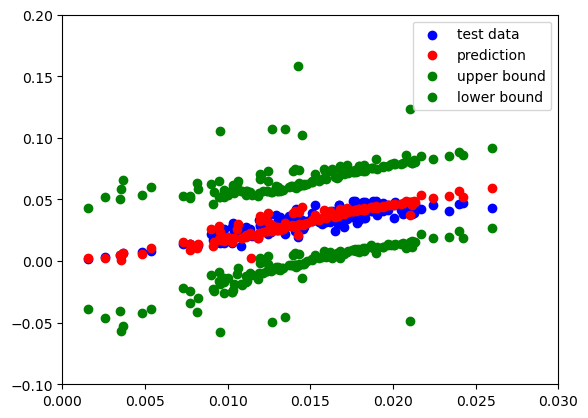

In [6]:
# plot the training data and prediction and the ground truth
# use the second column of x as the horizontal axis
# plt.scatter(x_train[1], y_train, color='black',label='training data')
plt.scatter(x_test[1], y_testtrue, color='blue',label='test data')
plt.scatter(x_test[1], y_testpred, color='red',label='prediction')
plt.scatter(x_test[1], y_ub, color='green',label='upper bound')
plt.scatter(x_test[1], y_lb, color='green',label='lower bound')

# set the range of axes
plt.xlim(0, 0.03)
plt.ylim(-0.1, 0.2)

plt.legend()

plt.show()

/Users/shuaiwencui/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/shuaiwencui/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/shuaiwencui/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


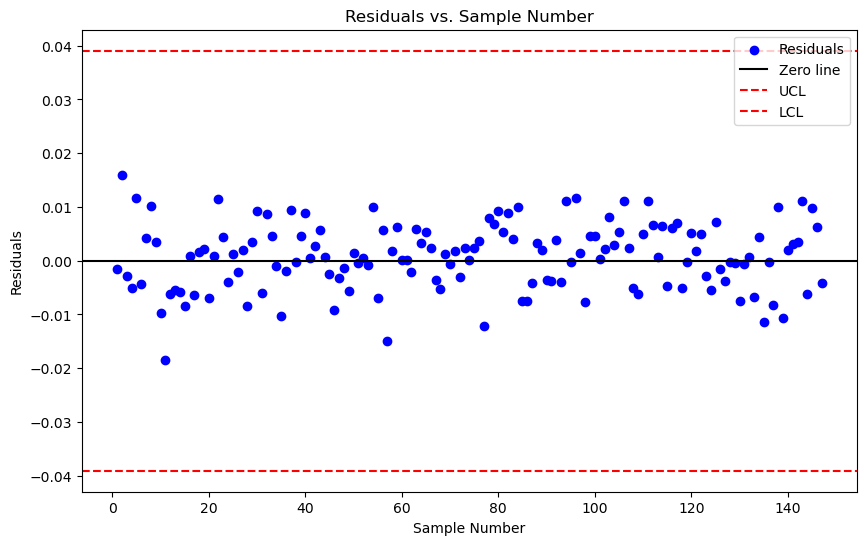

In [5]:
# residual
y_res = y_testpred - y_testtrue

# UCL and LCL
UCL = 1.96 * np.mean(y_testpred_std)
UCL = np.reshape(UCL, (1,))[0]

LCL = -1.96 * np.mean(y_testpred_std)
LCL = np.reshape(LCL, (1,))[0]

# min and max of y_res
y_res_min = np.min(y_res)
y_res_min = np.reshape(y_res_min, (1,))[0]
y_res_max = np.max(y_res)
y_res_max = np.reshape(y_res_max, (1,))[0]

# update UCL and LCL
if y_res_min < LCL:
    LCL = y_res_min

if y_res_max > UCL:
    UCL = y_res_max

# samplenumber
SampleNumber = np.linspace(1,len(y_res),len(y_res))

# plot residual points
plt.figure(figsize=(10, 6))
plt.scatter(SampleNumber, y_res, c='b', marker='o', label='Residuals')
plt.axhline(y=0, c='k', label='Zero line')
plt.axhline(y=UCL, c='r', linestyle='--', label='UCL')
plt.axhline(y=LCL, c='r', linestyle='--', label='LCL')
plt.xlabel('Sample Number')
plt.ylabel('Residuals')
plt.title('Residuals vs. Sample Number')
plt.legend(loc='best')
plt.show()



